# IMAGE CLASSIFICATION (FLOWERS)

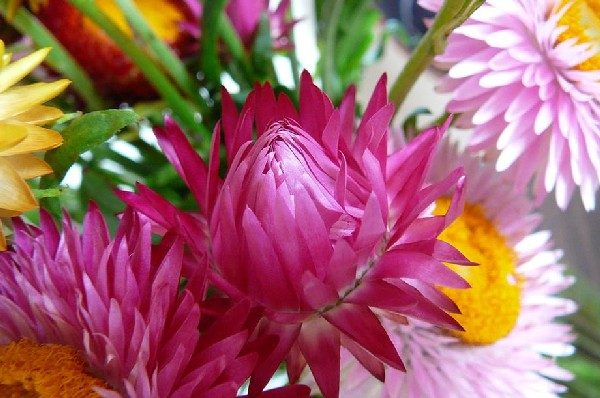

download data at https://www.kaggle.com/alxmamaev/flowers-recognition/data

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout

Using TensorFlow backend.


In [7]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a additional convolutional layer

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection

classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/flowers/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/vijay/Desktop/Studies/Data world/github/keras/Data/flowers/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3450 images belonging to 5 classes.
Found 873 images belonging to 5 classes.


In [9]:
classifier.fit_generator(training_set,
                         steps_per_epoch = (3450/32),
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps =( 873/32))

Epoch 1/50
108/107 [==============================] - 23s 216ms/step - loss: 1.3081 - acc: 0.4058 - val_loss: 1.3105 - val_acc: 0.4570
Epoch 2/50
108/107 [==============================] - 20s 186ms/step - loss: 1.1576 - acc: 0.5144 - val_loss: 1.1601 - val_acc: 0.5304
Epoch 3/50
108/107 [==============================] - 21s 196ms/step - loss: 1.0211 - acc: 0.5820 - val_loss: 1.0906 - val_acc: 0.5682
Epoch 4/50
108/107 [==============================] - 20s 190ms/step - loss: 0.9488 - acc: 0.6157 - val_loss: 1.1413 - val_acc: 0.5682
Epoch 5/50
108/107 [==============================] - 20s 187ms/step - loss: 0.8911 - acc: 0.6487 - val_loss: 1.0179 - val_acc: 0.6231
Epoch 6/50
108/107 [==============================] - 20s 188ms/step - loss: 0.8553 - acc: 0.6711 - val_loss: 1.2083 - val_acc: 0.5773
Epoch 7/50
108/107 [==============================] - 20s 188ms/step - loss: 0.8137 - acc: 0.6864 - val_loss: 1.0345 - val_acc: 0.6266
Epoch 8/50
108/107 [==============================] - 2

In [10]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [11]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/home/vijay/Desktop/Studies/Data world/github/keras/Data/flowers/single/3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'daisy'
elif result[0][1] == 1:
    prediction = 'dandelion'
elif result[0][2] == 1:
    prediction = 'rose'
elif result[0][3] == 1:
    prediction = 'sunflower'    
else:
    prediction='tulip'

In [12]:
prediction

'sunflower'